In [1]:
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Scraping MLB stats from ESPN go###

In this homework we will try to analyze the batting performances of different teams in Major League Baseball using the data available in the following link http://espn.go.com/mlb/stats/team/_/stat/batting 

We will first scrape the page corresponding to the 2015 season 

In [2]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015"

We will now scrape the table found in the above link. You can follow the class notebook to understand how to capture html table tags.

Q1) Write a function which will take the above url and return a pandas dataframe corresponding to the table found in the given link. 

In [3]:
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:20]]

[1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [4]:
col=[]
T=tr_elements[1]
print type(T)
i=0
print len(T)
for t in T.iterchildren():
    i+=1
    name=t.text_content()
    print '%d:"%s"'%(i,name)
    col.append((name,[]))

<class 'lxml.html.HtmlElement'>
15
1:"RK"
2:"TEAM"
3:"GP"
4:"AB"
5:"R"
6:"H"
7:"2B"
8:"3B"
9:"HR"
10:"TB"
11:"RBI"
12:"AVG"
13:"OBP"
14:"SLG"
15:"OPS"


In [5]:
for j in range(2,len(tr_elements)-4):
    T=tr_elements[j]
    if len(T)!=15:
        break
    i=0
    for t in T.iterchildren():
        data=t.text_content()
        if i>0:
            try:
                data=int(data)
            except:
                data=str(data)
        col[i][1].append(data)
        i+=1

In [6]:
[len(C) for (title,C) in col]

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]

In [7]:
Dict={title:column for (title,column) in col}
import pandas as pd
df=pd.DataFrame(Dict)
df.head()

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,308,17,5509,.269,162,1480,232,.340,.797,891,852,1,.457,2518,Toronto
1,272,19,5567,.251,162,1397,212,.323,.744,764,737,2,.421,2343,NY Yankees
2,279,32,5511,.257,162,1419,172,.325,.739,751,707,3,.413,2278,Texas
3,294,33,5640,.265,162,1496,161,.325,.740,748,706,4,.415,2339,Boston
4,274,49,5572,.265,162,1479,186,.315,.748,737,702,5,.432,2409,Colorado


In [8]:
def SCRAPE_ESPN_MLB_STATS(url):
    
    #Create column of headers
    col=[]
    T=tr_elements[1]
    i=0
    for t in T.iterchildren():
        name=t.text_content()
        col.append((name,[]))
    
    #Append data for each header
    for j in range(2,len(tr_elements)-4):
        T=tr_elements[j]
        if len(T)!=15:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            if i>0:
                try:
                    data=float(data)
                except:
                    data=str(data)
            col[i][1].append(data)
            i+=1
            
    #Create dataframe
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return df

Run the above function to scrape season 2015 stats.

In [9]:
df_2015 = SCRAPE_ESPN_MLB_STATS(url)
df_2015.head()

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,308,17,5509,0.269,162,1480,232,0.340,0.797,891,852,1,0.457,2518,Toronto
1,272,19,5567,0.251,162,1397,212,0.323,0.744,764,737,2,0.421,2343,NY Yankees
2,279,32,5511,0.257,162,1419,172,0.325,0.739,751,707,3,0.413,2278,Texas
3,294,33,5640,0.265,162,1496,161,0.325,0.740,748,706,4,0.415,2339,Boston
4,274,49,5572,0.265,162,1479,186,0.315,0.748,737,702,5,0.432,2409,Colorado


We will now produce plots analyzing performance of different teams on different statistical parameters

Q2) Write a function which will take the above dataframe and a list of column names as input and produces a set of plots corresponding to each of the column names provided

In [10]:
def produce_plots(df, col_names):
    for col in col_names:
        f=plt.figure()
        df[col].plot(kind='line')
        plt.title(col)
        plt.show()

Call the above function for the columns

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

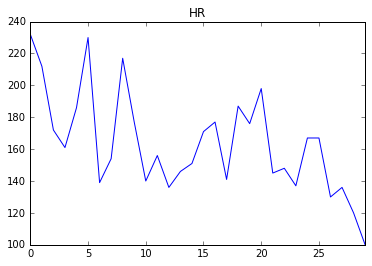

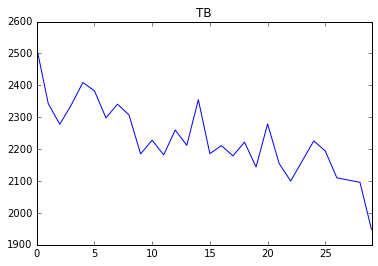

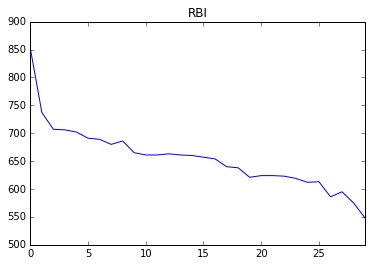

In [11]:
produce_plots(df_2015, ['HR','TB','RBI'])

Q3) We will now use the above functions to scrape for more seasons and analyze the performances over a period of 6 years from 2010-2015

In [12]:
dfs={}
for year in xrange(0,6):
    link = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/201'+str(year)
    dfs[year]=SCRAPE_ESPN_MLB_STATS(link)

Inorder to analyze performance of teams across seasons, we will need all the data in a single dataframe. 

Q4) Use appropriate pandas functions to combine the above dictionary of year:dataframe to produce one dataframe which has a new column corresponding to the year/season 

In [13]:
for i in dfs:
    dfs[i]['Year']=2010+i
dfs[0].head()

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM,Year
0,308,17,5509,0.269,162,1480,232,0.340,0.797,891,852,1,0.457,2518,Toronto,2010
1,272,19,5567,0.251,162,1397,212,0.323,0.744,764,737,2,0.421,2343,NY Yankees,2010
2,279,32,5511,0.257,162,1419,172,0.325,0.739,751,707,3,0.413,2278,Texas,2010
3,294,33,5640,0.265,162,1496,161,0.325,0.740,748,706,4,0.415,2339,Boston,2010
4,274,49,5572,0.265,162,1479,186,0.315,0.748,737,702,5,0.432,2409,Colorado,2010


In [14]:
for i in dfs:
    try:
        combined_df=pd.merge(combined_df,dfs[i],how='outer')
    except:
        combined_df=dfs[i]
combined_df.head()

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM,Year
0,308,17,5509,0.269,162,1480,232,0.340,0.797,891,852,1,0.457,2518,Toronto,2010
1,272,19,5567,0.251,162,1397,212,0.323,0.744,764,737,2,0.421,2343,NY Yankees,2010
2,279,32,5511,0.257,162,1419,172,0.325,0.739,751,707,3,0.413,2278,Texas,2010
3,294,33,5640,0.265,162,1496,161,0.325,0.740,748,706,4,0.415,2339,Boston,2010
4,274,49,5572,0.265,162,1479,186,0.315,0.748,737,702,5,0.432,2409,Colorado,2010


Q5) Now write a function which will take the above dataframe and a list of column names and produces a set of plots corresponding to each of the columns provided. Each plot is a set of subplots, where every subplot is a line graph of the column values over the 6 years for each of the teams in the dataframe.

In [64]:
def produce_plots_over_seasons(combined_df, col_names):
    for col in col_names:
        f=plt.figure(figsize=(20,3))
        plt.suptitle(col,fontsize=20, y=1.08)
        for i in xrange(0,6):
            plt.subplot(161+i)
            combined_df[combined_df['Year']==2010][col].plot(kind='line')
            plt.title(str(2010+i))
            plt.xlabel('RK')

Call the above function for the columns 

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

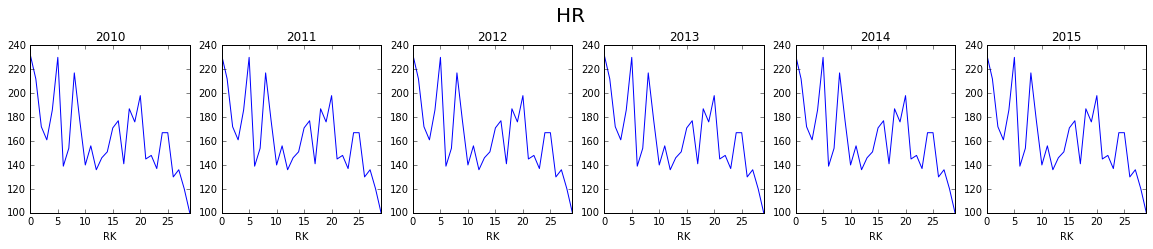

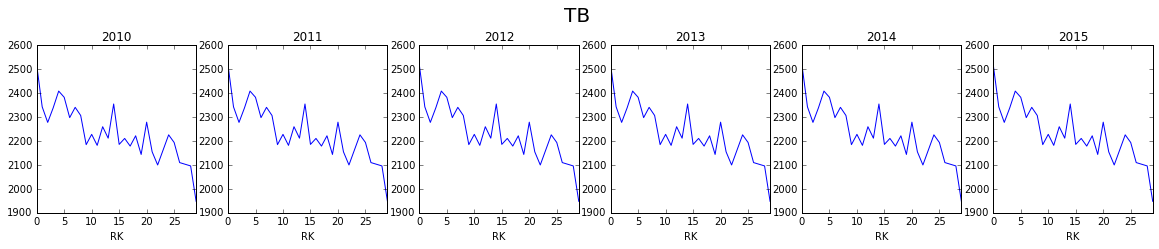

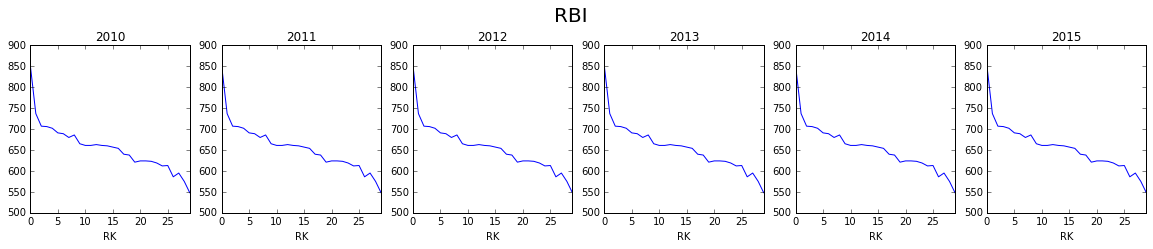

In [65]:
produce_plots_over_seasons(combined_df, ['HR','TB','RBI'])